In [4]:
import os
import sys

# Get the absolute path to the current notebook directory
notebook_dir = os.path.dirname(os.path.abspath('__file__'))

# Add parent directory (for segunda_parte) and current directory (for util) to Python path
parent_dir = os.path.dirname(notebook_dir)
sys.path.append(parent_dir)
sys.path.append(notebook_dir)

# Imports necesarios para el notebook
from random import seed
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from segunda_parte import obtener_cantidad_max
from util import time_algorithm
from collections import deque

# Siempre seteamos la seed de aleatoridad para que los resultados sean reproducibles
seed(12345)
np.random.seed(12345)

sns.set_theme()

In [2]:
def get_random_array(size: int):
    return deque(np.random.randint(0, 1000, size))

# La variable x van a ser los valores del eje x de los gráficos en todo el notebook
# Tamaño mínimo=100, tamaño máximo=10kk, cantidad de puntos=20
x = np.linspace(100, 10_000, 20).astype(int)

results = time_algorithm(obtener_cantidad_max, x, lambda s: [get_random_array(s)])

In [ ]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución del algoritmo')
ax.set_xlabel('Cantidad de monedas')
ax.set_ylabel('Tiempo de ejecución (s)')
None

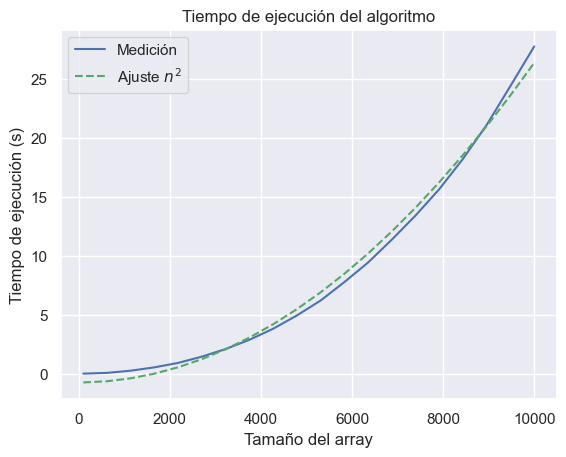

In [4]:
f_n2 = lambda x, c1, c2: c1 * x**2 + c2
c_n2, _ = sp.optimize.curve_fit(f_n2, x, [results[n] for n in x])

ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[n] for n in x], label="Medición")
ax.plot(x, [f_n2(n, c_n2[0], c_n2[1]) for n in x], 'g--', label="Ajuste $n^2$")
ax.set_title('Tiempo de ejecución del algoritmo')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
ax.legend()
None

Error

In [ ]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(f_n2(n, c_n2[0], c_n2[1]) for n in x - results[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Cantidad de monedas')
ax.set_ylabel('Error absoluto (s)')
None